In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("Zomato-data-.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
dataframe.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Text(0.5, 0, 'Type of restaurant')

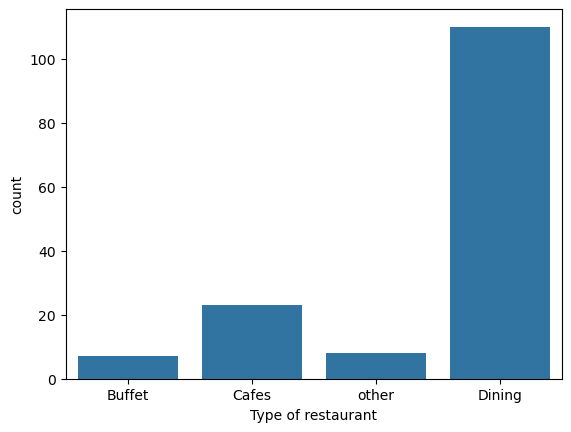

In [5]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


Text(0, 0.5, 'Votes')

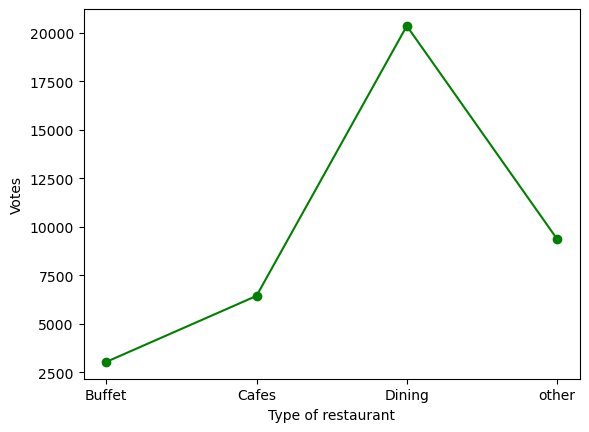

In [6]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
print(result)
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

In [7]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes,['name','rate','online_order','votes']]

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
                 name  rate online_order  votes
38  Empire Restaurant   4.4          Yes   4884


<Axes: xlabel='online_order', ylabel='count'>

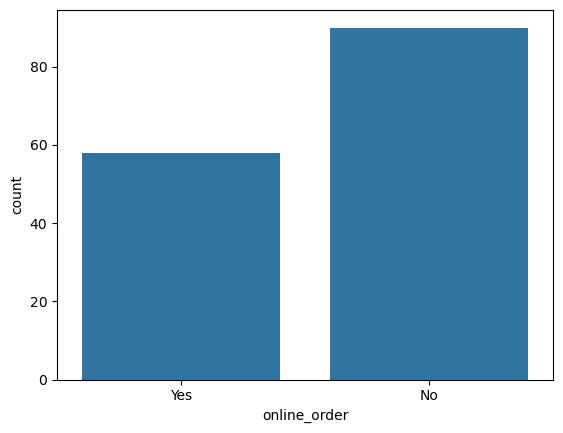

In [8]:
sns.countplot(x=dataframe['online_order'])

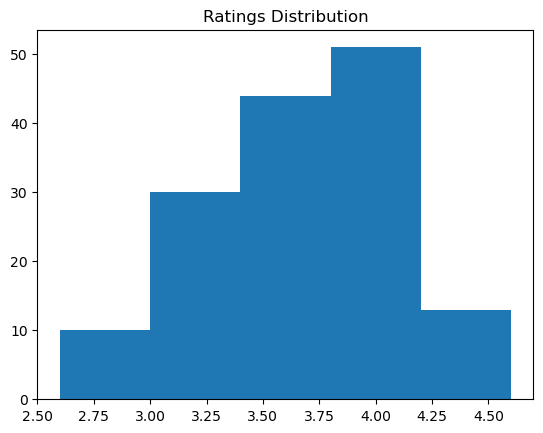

In [9]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

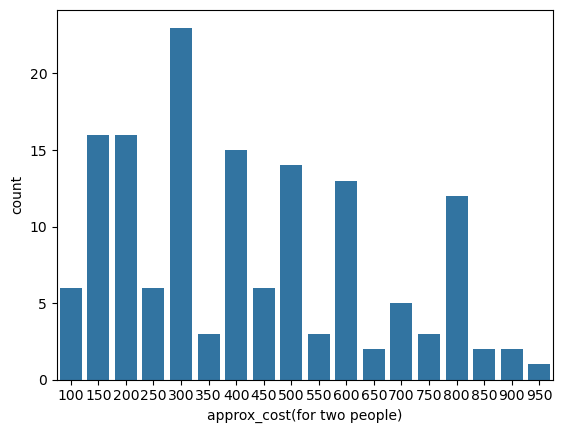

In [10]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

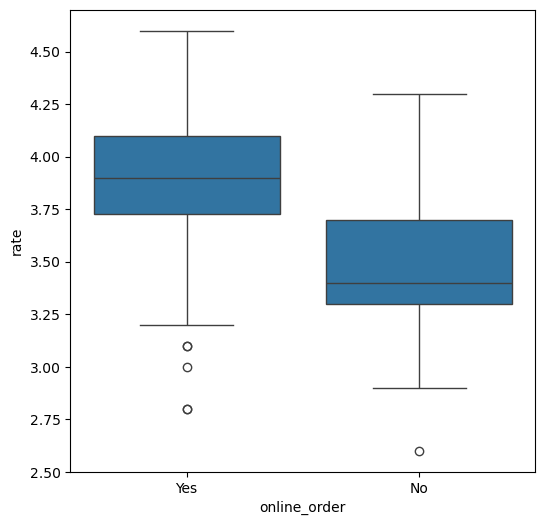

In [11]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

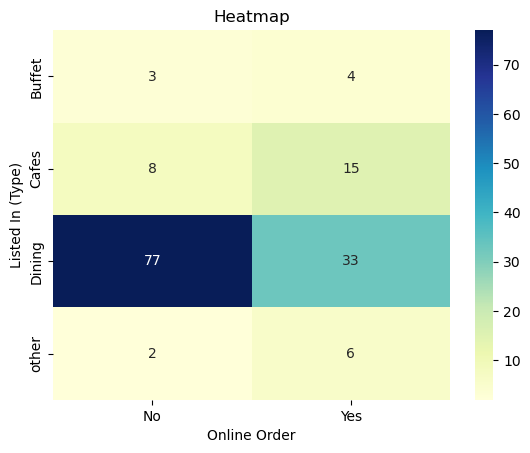

In [12]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

                 votes
listed_in(type)       
Buffet            4700
Cafes            12550
Dining           39300
other             5350


Text(0, 0.5, 'COST')

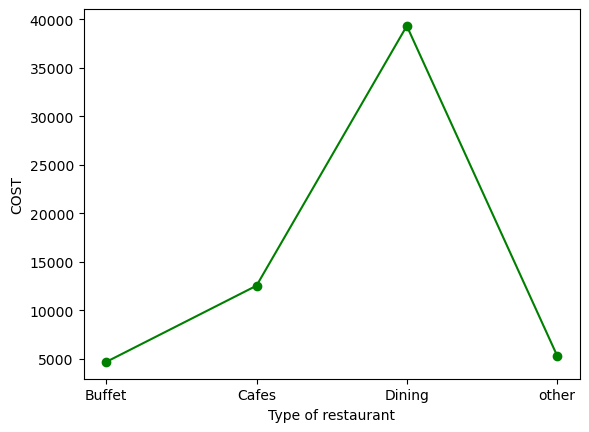

In [13]:
grouped_data = dataframe.groupby('listed_in(type)')['approx_cost(for two people)'].sum()
result = pd.DataFrame({'votes': grouped_data})
print(result)
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('COST')

                               COST
listed_in(type) online_order       
Buffet          Yes            3000
Cafes           Yes            8400
Dining          Yes           14350
other           Yes            3850


<Axes: xlabel='listed_in(type)', ylabel='approx_cost(for two people)'>

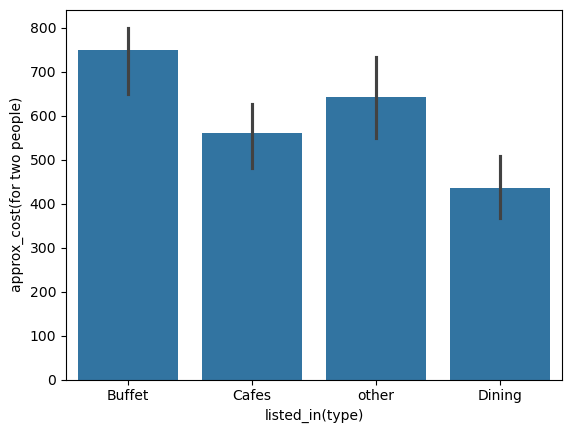

In [24]:
df = dataframe[dataframe['online_order']=='Yes']
grouped_data = df.groupby(['listed_in(type)','online_order'])['approx_cost(for two people)'].sum()
result = pd.DataFrame({'COST': grouped_data})
print(result)
cost=df['approx_cost(for two people)']
restrau = df['listed_in(type)']
sns.barplot(x="listed_in(type)", y=cost, data=df)

                               COST
listed_in(type) online_order       
Buffet          No             1700
Cafes           No             4150
Dining          No            24950
other           No             1500


<Axes: xlabel='listed_in(type)', ylabel='approx_cost(for two people)'>

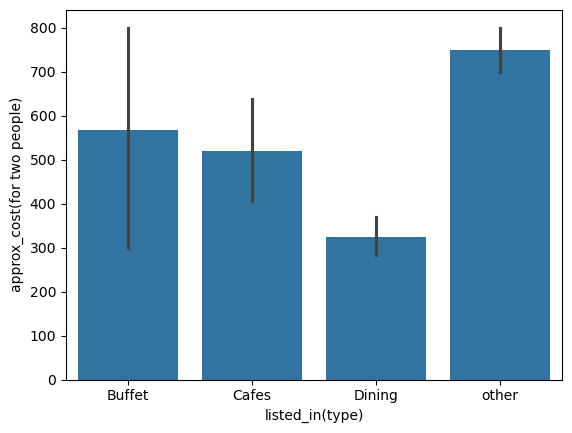

In [25]:
df = dataframe[dataframe['online_order']=='No']
grouped_data = df.groupby(['listed_in(type)','online_order'])['approx_cost(for two people)'].sum()
result = pd.DataFrame({'COST': grouped_data})
print(result)
cost=df['approx_cost(for two people)']
restrau = df['listed_in(type)']
sns.barplot(x="listed_in(type)", y=cost, data=df)